# Pymaceuticals Inc.
---

### Analysis

- After looking through the data it appears like there is a large population (249) of mice with equal numbers of male and female. We took the top 5 drugs with the most timepoint data and analized the results of the drugs. At the last timepoint of data we compared tumor size and found that Infubinol and Ceftamin had the largest tumor sizes, while Capomulin and Ramicane had the smallest. We then looked just at Capomulin and found that there was a significant looking reduction in tumor volume over the course of the study and found that there was a significant correlation coefficient of tumor volume to the wight of the mouse. This shows that as the mouse loses weight throughout the study it is through the reduction of the tumor and not other causes. Capomulin appears effective.
 

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame             - Topic covered in Traveling companions file
study_df = pd.merge(study_results, mouse_metadata, 
                    how='outer', on='Mouse ID')
# Display the data table for preview
study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [78]:
# Checking the number of mice.                                      - previous modules + module 6 for print funtion
unique_mice_count = study_df['Mouse ID'].nunique()
print(f"Number of unique mice: {unique_mice_count}")

Number of unique mice: 249


In [79]:
duplicate_mice = study_df[study_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_ids = duplicate_mice['Mouse ID'].unique()
duplicate_ids_array = pd.array(duplicate_ids)
duplicate_ids_array

<StringArray>
['g989']
Length: 1, dtype: string

In [ ]:
# Our data should be uniquely identified by Mouse ID and Timepoint                        - added NumPy because Panda array looked incorect.
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.             used learning assistant to help find duplicated function.
#                                                                                           Bottom of shift+tab shows subset feature for duplicated.
duplicate_mice = study_df[study_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_ids = duplicate_mice['Mouse ID'].unique()
duplicate_ids_array = np.array(duplicate_ids)
duplicate_ids_array

array(['g989'], dtype=object)

In [81]:
# Optional: Get all the data for the duplicate mouse ID.                   - Pandas cheatsheat
duplicate_df = study_df[study_df['Mouse ID'] == 'g989']
duplicate_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
586,g989,0,45.000000,0,Propriva,Female,21,26
587,g989,0,45.000000,0,Propriva,Female,21,26
588,g989,5,48.786801,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
590,g989,10,51.745156,0,Propriva,Female,21,26


In [82]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.   - tried removeduplicate originally, but eneded up with 1 higher count of unique
#                                                                        mice. Pandas cheatsheat had "!=" as "not equals to"
clean_study_df = study_df[study_df['Mouse ID'] != 'g989']
clean_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [83]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count = clean_study_df['Mouse ID'].nunique()
print(f"Number of unique mice: {unique_mice_count}")

Number of unique mice: 248


## Summary Statistics

In [84]:
clean_study_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [85]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

#Used intro to sum. statistics to get most of this BUT the standard error of means we covered was giving errors and would have to be created then
#merged in. This was how the learning assistant helped me calculate it all at once.


summary_stats = clean_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume ='mean',
    Median_Tumor_volume ='median',
    Tumor_Volume_Variance='var',
    Tumor_volume_Std_Dev='std',
    Total_Volume_Std_Err=lambda x: np.std(x, ddof=1) / np.sqrt(len(x))
).reset_index()

summary_stats.set_index('Drug Regimen', inplace=True)
summary_stats.columns = summary_stats.columns.str.replace('_', ' ')

summary_stats

,Mean Tumor Volume,Median Tumor volume,Tumor Volume Variance,Tumor volume Std Dev,Total Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [86]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    STD='std',
    SEM=lambda x: np.std(x, ddof=1) / np.sqrt(len(x))
).reset_index()

summary_stats.set_index('Drug Regimen', inplace=True)
summary_stats.columns = summary_stats.columns.str.replace('_', ' ')

#used assistant for this. couldn't find an example in class files.

summary_stats.columns = pd.MultiIndex.from_tuples([('Tumor Volume (mm3)', col) for col in summary_stats.columns])

summary_stats

Tumor Volume (mm3)                                          
                           Mean     Median   Variance       STD       SEM
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [87]:
drug_study = clean_study_df.groupby('Drug Regimen').size().sort_values(ascending=False)
drug_study

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
dtype: int64

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

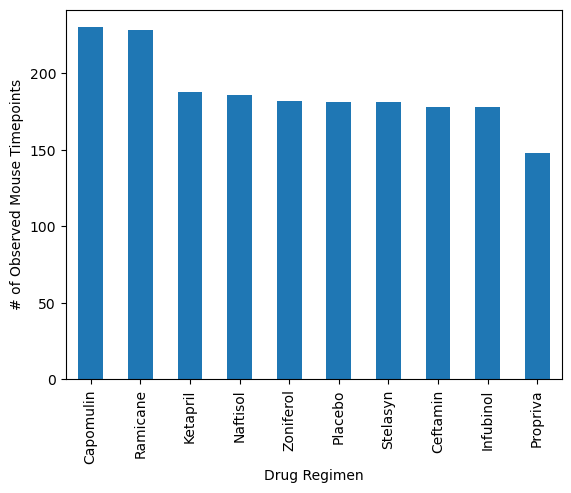

In [88]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_study.plot(kind='bar', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')

In [89]:
#Couldn't understand why I wasn't able to pull column for counts. Used assistant to figure out it needed to be df
#renamed because couldn't call original name '0'

drug_study_df = drug_study.reset_index()
drug_study_df.columns = ['Drug Regimen', 'Time Points']

In [90]:
print(drug_study_df.head())

  Drug Regimen  Time Points
0    Capomulin          230
1     Ramicane          228
2     Ketapril          188
3     Naftisol          186
4    Zoniferol          182


<BarContainer object of 10 artists>

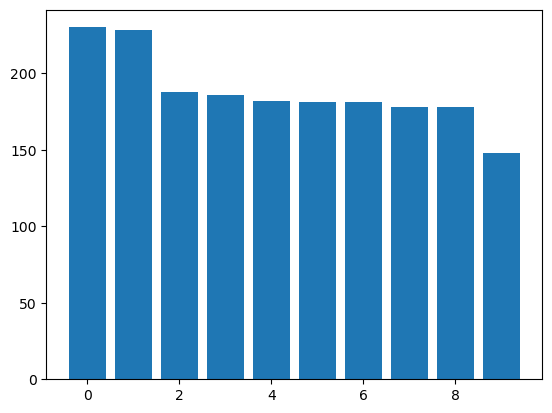

In [91]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Used bar chart and AvgRain bar chart files to help with these
x_axis = np.arange(len(drug_study_df))
plt.bar(x_axis, drug_study_df['Time Points'])

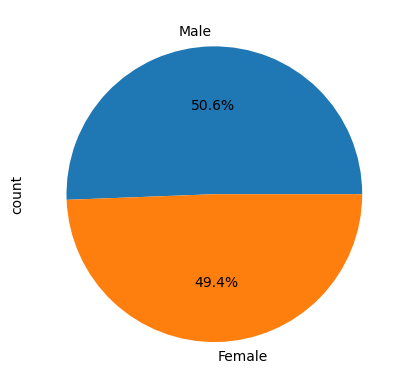

In [92]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

#Library usage task was used for this

# Get the unique mice with their gender
gender_counts = study_df['Sex'].value_counts()

# Make the pie chart
gender_pie = gender_counts.plot(kind="pie", y='count', autopct='%1.1f%%')

Text(0.0, 1.0, 'Count')

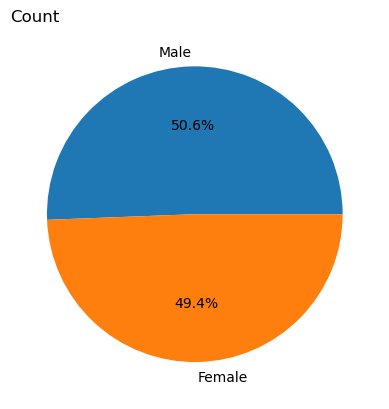

In [93]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Used student py_pies for this

# Get the unique mice with their gender
genders = ['Male', 'Female']
plt.pie(gender_counts, labels=genders, autopct="%1.1f%%")
plt.title("Count", loc='left')
# Make the pie chart


## Quartiles, Outliers and Boxplots

In [94]:
clean_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [102]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
#Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ['capomulin', 'ramicane', 'infubinol', 'ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
filtered_study = clean_study_df[clean_study_df['Drug Regimen'].str.lower().isin(drugs)]
last_timepoints = filtered_study.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoints, filtered_study, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [109]:
# Define the list of treatments
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Dictionary to store tumor volume data for each drug (for later plotting/analysis)
tumor_volumes_by_drug = {}

# Calculate IQR and identify potential outliers
for drug in drugs:
    # Filter data for each drug
    drug_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == drug]
    final_tumor_volumes = drug_data['Tumor Volume (mm3)']
    tumor_volumes_by_drug[drug] = final_tumor_volumes

    # Calculate quartiles and IQR
    quartiles = final_tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outlier bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Identify outliers
    outliers = final_tumor_volumes[(final_tumor_volumes < lower_bound) | (final_tumor_volumes > upper_bound)]

    # add subset
    tumor_volumes_by_drug[drug] = {
        "tumor_volumes": final_tumor_volumes,
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "outliers": outliers
    }

    # Print potential outliers for each drug
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\riley\AppData\Local\Temp\ipykernel_25464\1223739523.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=drugs, flierprops=dict(marker='o', color='red', markersize=10))


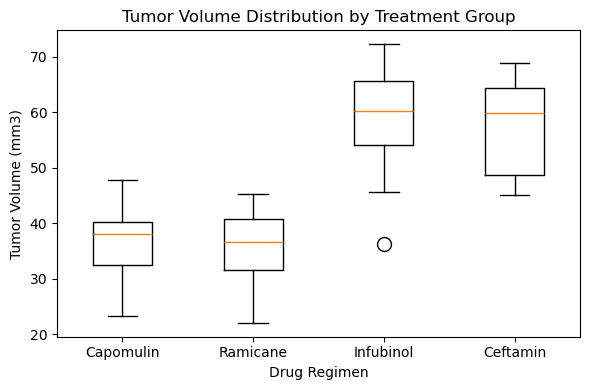

In [131]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
data_to_plot = [tumor_volumes_by_drug[drug]["tumor_volumes"] for drug in drugs]

plt.figure(figsize=(6, 4))
plt.boxplot(data_to_plot, labels=drugs, flierprops=dict(marker='o', color='red', markersize=10))

plt.title('Tumor Volume Distribution by Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

plt.tight_layout()
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

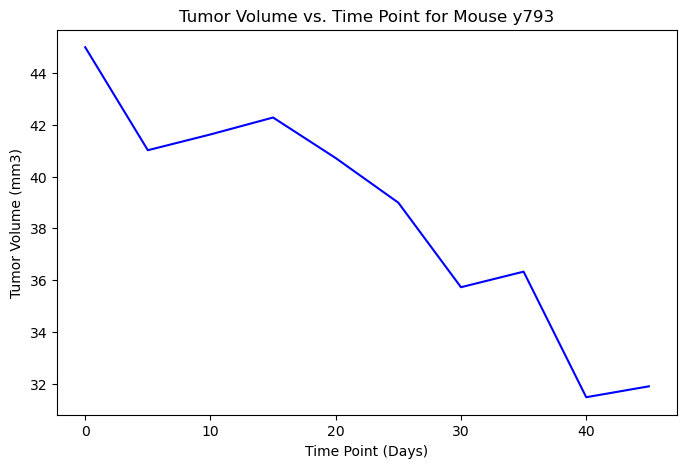

In [163]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin                         - traveling companions section with 
capomulin_data = clean_study_df[clean_study_df['Drug Regimen'].str.lower() == 'capomulin']
mouse_id = 'y793'
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

plt.figure(figsize=(8, 5))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='blue', linestyle='-')

plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id}')
plt.xlabel('Time Point (Days)')
plt.ylabel('Tumor Volume (mm3)')

In [164]:
capomulin_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
174,b128,0,45.000000,0,Capomulin,Female,9,22
175,b128,5,45.651331,0,Capomulin,Female,9,22
176,b128,10,43.270852,0,Capomulin,Female,9,22
177,b128,15,43.784893,0,Capomulin,Female,9,22
178,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1831,y793,25,38.992734,2,Capomulin,Male,17,17
1832,y793,30,35.726023,2,Capomulin,Male,17,17
1833,y793,35,36.327870,2,Capomulin,Male,17,17
1834,y793,40,31.475411,2,Capomulin,Male,17,17


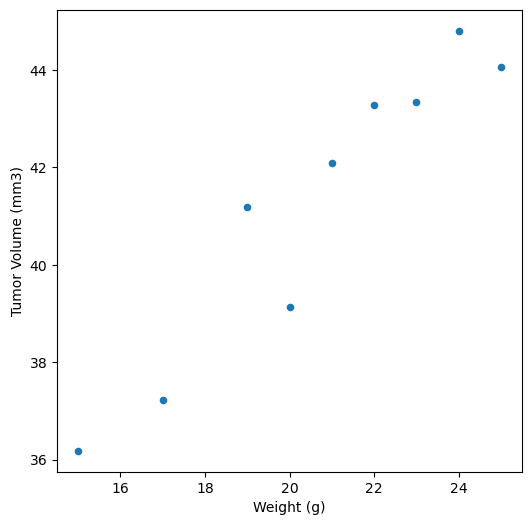

In [188]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen             - mgp_solution was used for this and learning assistant to reset index
avg_tumor_volume = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()
avg_tumor_volume.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', figsize=(6,6))
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.9034966277438602


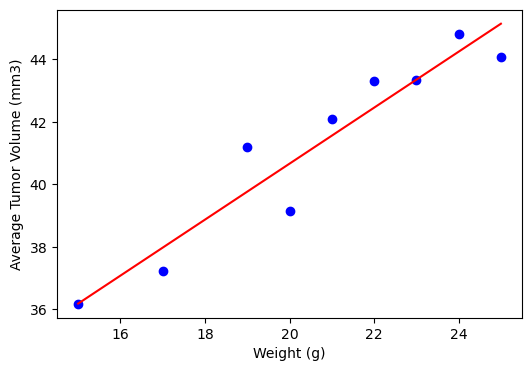

In [199]:
# I used the regression_solution section for this but I didn't like or understand the regression line equation from that so used learning assistant for that.

slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)

regression_line = slope * avg_tumor_volume['Weight (g)'] + intercept
plt.figure(figsize=(6,4))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], color='blue', label='Average Tumor Volume')
plt.plot(avg_tumor_volume['Weight (g)'], regression_line, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

print(f"The correlation between mouse weight and the average tumor volume is {r_value**2}")